# 1) & 2)

In [1]:
# Importing all the required packages:
import selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException
import warnings
warnings.filterwarnings('ignore')
from bs4 import BeautifulSoup
import requests
import time
import pandas as pd

In [26]:
# Initialize the driver 

driver = webdriver.Chrome()

In [27]:
# Browsing the site 

driver.get('https://www.amazon.in/')

In [28]:
# Entering the product or title which user wants to search for:
user_input = input('Enter the product or title you need to search for: ')

title = driver.find_element(By.XPATH, '//div[@class="nav-fill"]/div/input')
title.send_keys(user_input)

Enter the product or title you need to search for: Iphone 15 Pro


In [29]:
# Clicking on the search button

search = driver.find_element(By.XPATH, '/html/body/div[1]/header/div/div[1]/div[2]/div/form/div[3]/div/span/input')
search.click()

In [10]:
# Data to be Scraped: 
# Brand Name", "Name of the Product", "Price", "Return/Exchange", "Expected Delivery", "Availability" and  
# “Product URL”

In [42]:
# Scraping the Product URL:

Product_url = []

start = 0
end = 3
for page in range(start, end):
    url = driver.find_elements(By.XPATH, '//h2[@class="a-size-mini a-spacing-none a-color-base s-line-clamp-2"]/a[1]')
    for i in url:
        Product_url.append(i.get_attribute('href'))
        next_button = driver.find_element(By.XPATH, '//div[@class="a-section a-text-center s-pagination-container"]/span/a[3]')
        

In [44]:
print(len(Product_url))
print(Product_url)

54
['https://www.amazon.in/sspa/click?ie=UTF8&spc=MTo4ODI1NTI5NzExODIyMTkyOjE3MjA3MTY3MjQ6c3BfYXRmOjMwMDA1NDM0NTk0ODkzMjo6MDo6&url=%2FApple-iPhone-15-Pro-256%2Fdp%2FB0CHX5J2ND%2Fref%3Dsr_1_1_sspa%3Fcrid%3D3MW9EJNAWBN8L%26dib%3DeyJ2IjoiMSJ9.ZVZ-J0oRCkgY5JY6S6WqTrj_lVeBkbSIWiQ3pZc6AvD0GwH7qQjH_XK4r63vMPJtmfvxlHdrC_rN2M1MtpmxGBqE-7TM-pcraa_j8FFJFN4l3yuW00xkxtNj-hNqab-HyI93LXblPX6OqjjjuJJcLxdhz75WGvtqqFJk8eXKkcl9i7c57MxJObKmrLSxdqwxUauFJciY4YDZqV2UFhhCvU4Wm7GXZ4DLd0-Nf66LTDQ.6jc2xSYv9YUY09cTDHmm8chjUTAL2dJSvS8aiDdiwEY%26dib_tag%3Dse%26keywords%3DIphone%2B15%2BPro%26qid%3D1720716724%26sprefix%3Diphone%2B15%2Bpro%252Caps%252C274%26sr%3D8-1-spons%26sp_csd%3Dd2lkZ2V0TmFtZT1zcF9hdGY%26psc%3D1', 'https://www.amazon.in/sspa/click?ie=UTF8&spc=MTo4ODI1NTI5NzExODIyMTkyOjE3MjA3MTY3MjQ6c3BfYXRmOjMwMDA1NDM0NTk0NzQzMjo6MDo6&url=%2FApple-iPhone-15-128-GB%2Fdp%2FB0CHX2F5QT%2Fref%3Dsr_1_2_sspa%3Fcrid%3D3MW9EJNAWBN8L%26dib%3DeyJ2IjoiMSJ9.ZVZ-J0oRCkgY5JY6S6WqTrj_lVeBkbSIWiQ3pZc6AvD0GwH7qQjH_XK4r63vMPJtmfvxlH

In [45]:
# Clicking on 1 product for collecting all the details of it and others :
product_click = driver.find_element(By.XPATH, '//h2[@class="a-size-mini a-spacing-none a-color-base s-line-clamp-2"]/a[1]')
product_click.click()

In [46]:
# Scraping the Brand Name

Brand_name = []

for i in Product_url:
    driver.get(i)
    time.sleep(5)
    try:
        brand_name = driver.find_element(By.XPATH, '/html/body/div[4]/div/div[3]/div[11]/div[49]/div/table/tbody/tr[1]/td[2]/span')
        Brand_name.append(brand_name.text)
    except NoSuchElementException:
        Brand_name.append('Not Present')

In [47]:
print(Brand_name)
print(len(Brand_name))

['Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple']
54


In [48]:
# Scraping the Availability and Exchange-Return 

Availability = []
Exchange_return = []

for i in product_url:
    driver.get(i)
    time.sleep(3)
    
    availability = driver.find_element(By.XPATH, '//div[@class="a-section"]/div/span')
    Availability.append(availability.text)
    
    exchange_return = driver.find_element(By.XPATH, '//div[@class="a-section a-spacing-none icon-content"]/span')
    Exchange_return.append(exchange_return.text)
    

In [52]:
print(Availability)
print(len(Availability))

['In stock', 'In stock', 'In stock', 'In stock', 'Only 1 left in stock.', 'In stock', 'In stock', 'In stock', '', 'In stock', 'In stock', 'Available to ship in 1-2 days', 'In stock', 'Only 2 left in stock.', 'In stock', 'Only 1 left in stock.', 'In stock', 'Only 1 left in stock.', 'In stock', 'In stock', 'In stock', 'In stock', 'Only 1 left in stock.', 'In stock', 'In stock', 'In stock', '', 'In stock', 'In stock', 'Available to ship in 1-2 days', 'In stock', 'Only 2 left in stock.', 'In stock', 'Only 1 left in stock.', 'In stock', 'Only 1 left in stock.', 'In stock', 'In stock', 'In stock', 'In stock', 'Only 1 left in stock.', 'In stock', 'In stock', 'In stock', '', 'In stock', 'In stock', 'Available to ship in 1-2 days', 'In stock', 'Only 2 left in stock.', 'In stock', 'Only 1 left in stock.', 'In stock', 'Only 1 left in stock.']
54


In [51]:
print(Exchange_return)
print(len(Exchange_return))

['7 days Service Centre Replacement', '7 days Service Centre Replacement', '7 days Service Centre Replacement', '7 days Service Centre Replacement', '7 days Service Centre Replacement', '7 days Service Centre Replacement', '7 days Service Centre Replacement', '7 days Service Centre Replacement', '7 days Service Centre Replacement', '7 days Service Centre Replacement', '7 days Service Centre Replacement', '7 days Service Centre Replacement', '7 days Service Centre Replacement', '7 days Service Centre Replacement', '7 days Service Centre Replacement', '7 days Service Centre Replacement', '7 days Service Centre Replacement', '7 days Service Centre Replacement', '7 days Service Centre Replacement', '7 days Service Centre Replacement', '7 days Service Centre Replacement', '7 days Service Centre Replacement', '7 days Service Centre Replacement', '7 days Service Centre Replacement', '7 days Service Centre Replacement', '7 days Service Centre Replacement', '7 days Service Centre Replacement', 

In [83]:
# Scraping the Product Name, Price and Expected Delievery

Product_Name = []
PRICE = []
Expected_Delivery = []

for i in Product_url[:54]:
    driver.get(i)
    time.sleep(5)
    
    product_name = driver.find_element(By.XPATH, '//div[@class="a-section a-spacing-none"]/h1/span')
    Product_Name.append(product_name.text)
    
    price = driver.find_element(By.XPATH, '//div[@class="a-section a-spacing-none aok-align-center aok-relative"]/span/span/span[2]')
    PRICE.append(price.text)
    
    expected_delivery = driver.find_element(By.XPATH, '//div[@class="a-spacing-base"]/span/span')
    Expected_Delivery.append(expected_delivery.text)

In [85]:
df = pd.DataFrame({'Brand Name': Brand_name, 'Product Name': Product_Name, 'Price': PRICE, 'Exchange/Return': Exchange_return, 'Expected Delivery': Expected_Delivery, 'Availability': Availability, 'Product URL': Product_url})
df[:54]

,Brand Name,Product Name,Price,Exchange/Return,Expected Delivery,Availability,Product URL
0,Apple,Apple iPhone 15 Pro (256 GB) - Natural Titanium,"1,37,600",7 days Service Centre Replacement,"Saturday, 13 July",In stock,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
1,Apple,Apple iPhone 15 (128 GB) - Blue,"70,999",7 days Service Centre Replacement,"Saturday, 13 July",In stock,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
2,Apple,Apple iPhone 15 Pro (256 GB) - Natural Titanium,"1,37,600",7 days Service Centre Replacement,"Saturday, 13 July",In stock,https://www.amazon.in/Apple-iPhone-15-Pro-256/...
3,Apple,Apple iPhone 15 Pro (256 GB) - Blue Titanium,"1,37,600",7 days Service Centre Replacement,"Saturday, 13 July",In stock,https://www.amazon.in/Apple-iPhone-15-Pro-256/...
4,Apple,Apple iPhone 15 Pro (128 GB) - White Titanium,"1,28,200",7 days Service Centre Replacement,"Tuesday, 16 July",Only 1 left in stock.,https://www.amazon.in/Apple-iPhone-15-Pro-128/...
5,Apple,Apple iPhone 15 Pro (256 GB) - Black Titanium,"1,37,600",7 days Service Centre Replacement,"Saturday, 13 July",In stock,https://www.amazon.in/Apple-iPhone-15-Pro-256/...
6,Apple,Apple iPhone 15 Pro (128 GB) - Natural Titanium,"1,28,200",7 days Service Centre Replacement,"Monday, 15 July",In stock,https://www.amazon.in/Apple-iPhone-15-Pro-128/...
7,Apple,Apple iPhone 15 Pro (512 GB) - Black Titanium,"1,56,400",7 days Service Centre Replacement,"Monday, 15 July",In stock,https://www.amazon.in/Apple-iPhone-15-Pro-512/...
8,Apple,Apple iPhone 15 Pro (128 GB) - Blue Titanium,"1,28,200",7 days Service Centre Replacement,16 - 20 July,,https://www.amazon.in/Apple-iPhone-15-Pro-128/...
9,Apple,Apple iPhone 15 (128 GB) - Blue,"70,999",7 days Service Centre Replacement,"Saturday, 13 July",In stock,https://www.amazon.in/Apple-iPhone-15-128-GB/d...


In [ ]:
# Created the csv file

df.to_csv('Iphone 15 pro.csv', index=False, header=True, na_rep='NA', sep=';', quotechar="'")

# 3) Write a python program to access the search bar and search button on images.google.com and scrape 10 images each for keywords ‘fruits’, ‘cars’ and ‘Machine Learning’, ‘Guitar’, ‘Cakes’.  

In [4]:
# Initialize the driver  

driver = webdriver.Chrome()

In [5]:
# Browsing the site 

driver.get('https://images.google.com/')

In [6]:
# Entering Fruits :
fruits = driver.find_element(By.XPATH, '/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/textarea')
fruits.send_keys('Fruits')

In [12]:
# Clicking on search button
search = driver.find_element(By.XPATH, '//div[@class="zgAlFc"]/span')
search.click()

['', '', '', '', '', '', '', '', '', '']
10

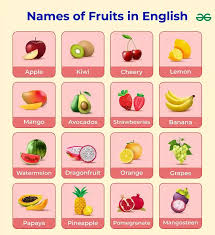
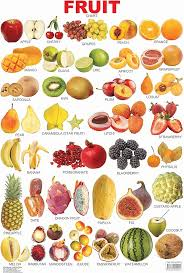
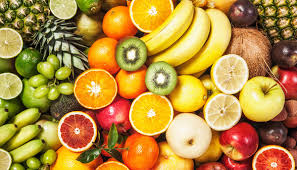
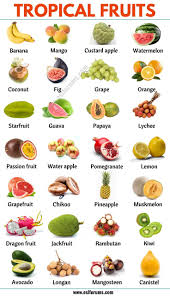
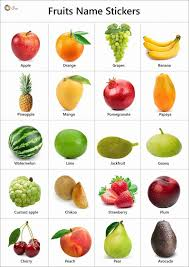
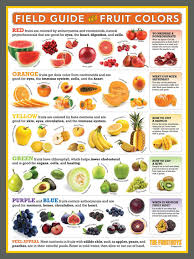
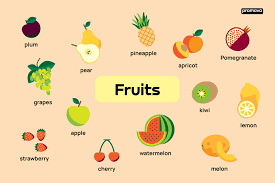
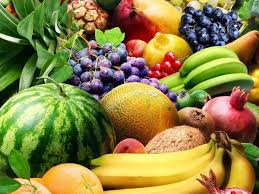
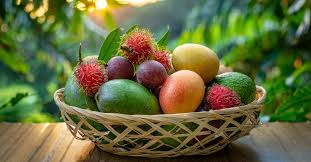
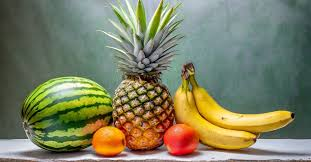

In [29]:
# Scraping 10 imgs of Fruits:

fruit_img = []
img_tag = driver.find_elements(By.XPATH, '//div[@class="H8Rx8c"]/g-img/img')

for element in img_tag[:10]:
    img_src = element.get_attribute('src')
    fruit_img.append(img_src)

print(fruit_img)
print(len(fruit_img))

driver.quit()

In [35]:
# Initialize the driver

driver = webdriver.Chrome()

In [36]:
# Browsing the site 

driver.get('https://images.google.com/')

In [37]:
# Entering cars on the search input:

cars = driver.find_element(By.XPATH, '/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/textarea')
cars.send_keys('Cars')

In [39]:
# Clicking on search button

search = driver.find_element(By.XPATH, '//div[@class="zgAlFc"]/span')
search.click()

10
['', '', '', '', '', '', '', '', '', '']

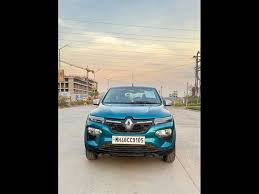
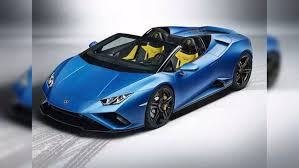
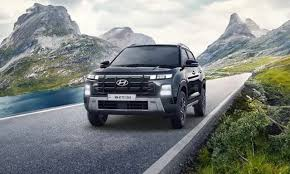
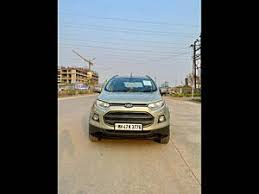
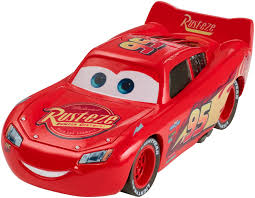
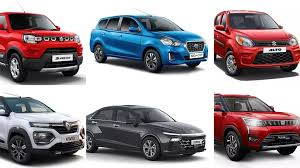
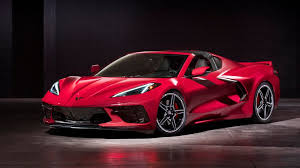
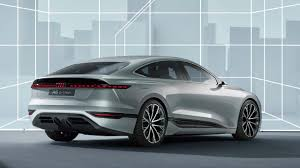
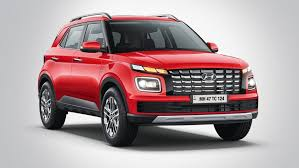
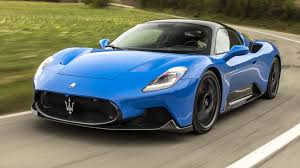

In [41]:
# Scraping 10 Cars img:

car_img = []

car_tag = driver.find_elements(By.XPATH, '//div[@class="H8Rx8c"]/g-img/img')
for element in car_tag[:10]:
    img_src = element.get_attribute('src')
    car_img.append(img_src)
    
print(len(car_img))
print(car_img)

driver.quit()

In [42]:
# Initialize the driver 

driver = webdriver.Chrome()

In [43]:
# Browsing the site 

driver.get('https://images.google.com/')

In [44]:
# Entering Machine Learning on the search input:

machine_learning = driver.find_element(By.XPATH, '/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/textarea')
machine_learning.send_keys('Machine Learning')

In [45]:
# Clicking on search button

search = driver.find_element(By.XPATH, '//div[@class="zgAlFc"]/span')
search.click()

10
['', '', '', '', '', '', '', '', '', '']

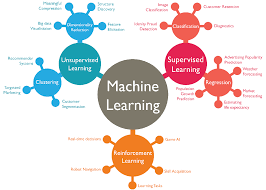
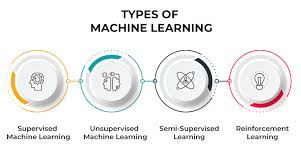
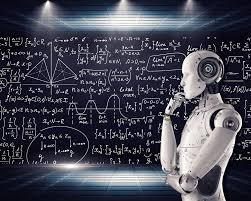
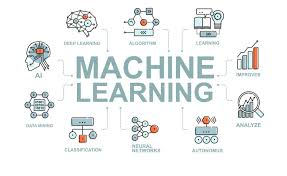
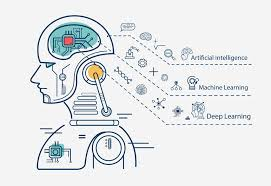
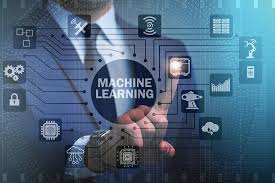
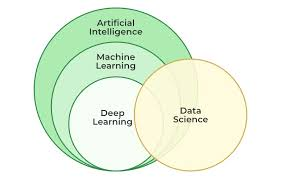
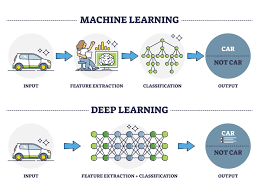
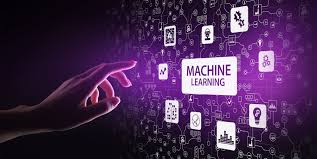
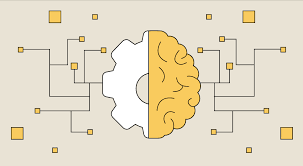

In [47]:
# Scraping 10 img of ML:

ML_img = []

ML_tag = driver.find_elements(By.XPATH, '//div[@class="H8Rx8c"]/g-img/img')

for element in ML_tag[:10]:
    img_src = element.get_attribute('src')
    ML_img.append(img_src)
    
print(len(ML_img))
print(ML_img)

driver.quit()

In [48]:
# Initialize the driver # Browsing the site 

driver = webdriver.Chrome()

In [49]:
# Browsing the site 

driver.get('https://images.google.com/')

In [50]:
# Entering Guitars on the search input:

guitar = driver.find_element(By.XPATH, '/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/textarea')
guitar.send_keys('Guitars')

In [52]:
# Clicking on search button

search = driver.find_element(By.XPATH, '//div[@class="zgAlFc"]/span')
search.click()

10
['', '', '', '', '', '', '', '', '', '']

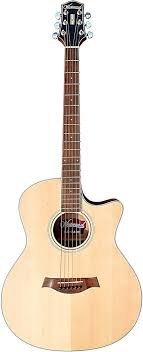
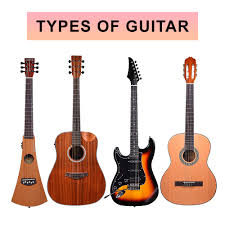
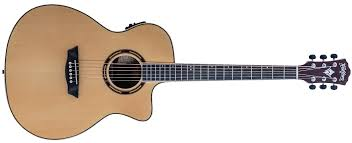
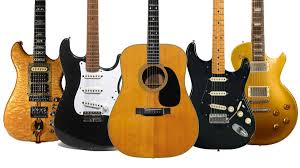
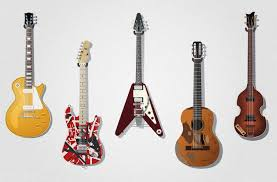
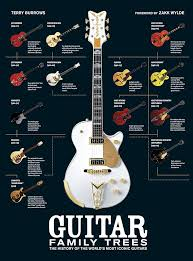
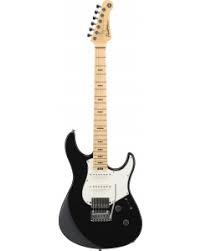
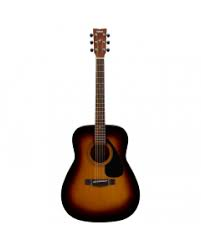
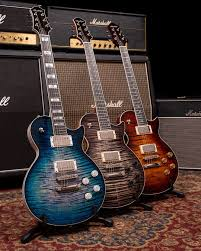
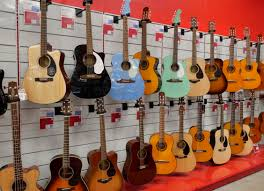

In [57]:
# Scraping 10 Guitars img:

guitar_img = []

guitar_tag = driver.find_elements(By.XPATH, '//div[@class="H8Rx8c"]/g-img/img')

for element in guitar_tag[:10]:
    img_src = element.get_attribute('src')
    guitar_img.append(img_src)
    
print(len(guitar_img))
print(guitar_img)

driver.quit()

In [63]:
# Initialize the driver

driver = webdriver.Chrome()

In [64]:
# Browsing the site 

driver.get('https://images.google.com/')

In [65]:
# Entering cakes on the search input:

cakes = driver.find_element(By.XPATH, '/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/textarea')
cakes.send_keys('Cakes')

In [67]:
# Clicking on search button

search = driver.find_element(By.XPATH, '//div[@class="zgAlFc"]/span')
search.click()

10
['', '', '', 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQbuagCvIoEeGwkYevemGsbScvXsd56PFqOSQ&s', '', '', '', '', '', '']

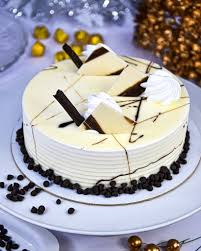
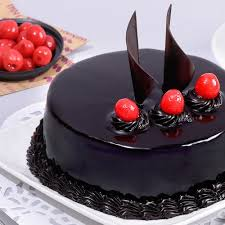
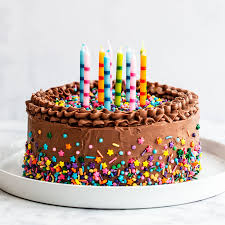
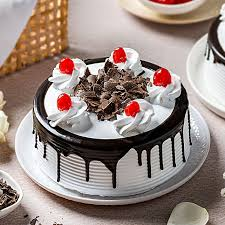
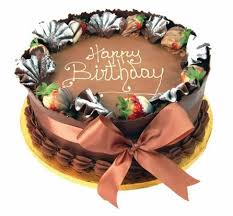
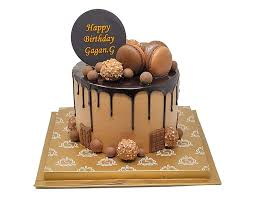
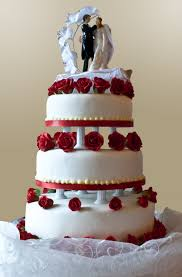
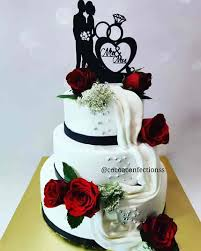
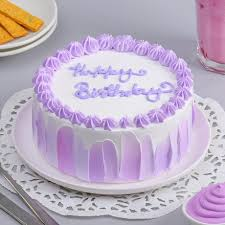

In [70]:
# Scraping 10 Cakes img:

cake_img = []

cake_tag = driver.find_elements(By.XPATH, '//div[@class="H8Rx8c"]/g-img/img')

for element in cake_tag[:10]:
    img_src = element.get_attribute('src')
    cake_img.append(img_src)
    
print(len(cake_img))
print(cake_img)

driver.quit()

In [71]:
# Creating a DataFrame of all the collected items:
df = pd.DataFrame({'Imgs of fruits': fruit_img, 'Imgs of Cars': car_img, 'Imgs of Machine Learning': ML_img, 'Imgs of Guitar': guitar_img, 'Imgs of Cakes': cake_img})
df

,Imgs of fruits,Imgs of Cars,Imgs of Machine Learning,Imgs of Guitar,Imgs of Cakes
0,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
1,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
2,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
3,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...",https://encrypted-tbn0.gstatic.com/images?q=tb...
4,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
5,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
6,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
7,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
8,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
9,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."


# Write a python program to search for a smartphone(e.g.: Oneplus Nord, pixel 4A, etc.) on www.flipkart.com and scrape following details for all the search results displayed on 1st page. Details to be scraped: “Brand Name”, “Smartphone name”, “Colour”, “RAM”, “Storage(ROM)”, “Primary Camera”,  “Secondary Camera”, “Display Size”, “Battery Capacity”, “Price”, “Product URL”. Incase if any of the details is missing then replace it by “- “. Save your results in a dataframe and CSV.  

In [2]:
# Initialize the driver

driver = webdriver.Chrome()

In [3]:
# Browsing the site 

driver.get('https://www.flipkart.com/')

In [5]:
# Entering the input:

smartphone = driver.find_element(By.CLASS_NAME, "Pke_EE")
smartphone.send_keys('Samsung Flip 5')

In [7]:
# Clicking the search button:

search = driver.find_element(By.XPATH, '//div[@class="_1sFryS _2alaMB"]/button')
search.click()

In [8]:
# Clicking on the first item to Scrap all the required details:

item_click = driver.find_element(By.XPATH, '//div[@class="KzDlHZ"]')
item_click.click()

In [10]:
# Scraping the Product URL

smartphone_url = []

start = 0
end = 1

for page in range(start, end):
    url = driver.find_elements(By.XPATH, '//div[@class="cPHDOP col-12-12"]/div/div/div/a[1]')
    for i in url:
        smartphone_url.append(i.get_attribute('href'))
    
print(smartphone_url)
print(len(smartphone_url))

['https://www.flipkart.com/samsung-galaxy-z-flip5-cream-256-gb/p/itm1ae4ac514a962?pid=MOBGRS32HTY6FHB2&lid=LSTMOBGRS32HTY6FHB2OMALSY&marketplace=FLIPKART&q=Samsung+Flip+5&store=tyy%2F4io&srno=s_1_1&otracker=search&otracker1=search&fm=organic&iid=829ff211-2c7a-4492-8377-e23d32f84d03.MOBGRS32HTY6FHB2.SEARCH&ppt=hp&ppn=homepage&ssid=v3szswvwz40000001720968845889&qH=e156b32c00357fbc', 'https://www.flipkart.com/samsung-galaxy-z-flip5-mint-256-gb/p/itm3038611e95123?pid=MOBGRS32NXYPBYMB&lid=LSTMOBGRS32NXYPBYMBRJJ8Z4&marketplace=FLIPKART&q=Samsung+Flip+5&store=tyy%2F4io&srno=s_1_2&otracker=search&otracker1=search&fm=organic&iid=829ff211-2c7a-4492-8377-e23d32f84d03.MOBGRS32NXYPBYMB.SEARCH&ppt=hp&ppn=homepage&ssid=v3szswvwz40000001720968845889&qH=e156b32c00357fbc', 'https://www.flipkart.com/samsung-galaxy-z-flip5-cream-512-gb/p/itm6f238f9a640fe?pid=MOBGRS32PKBCKUGQ&lid=LSTMOBGRS32PKBCKUGQ2X4XTO&marketplace=FLIPKART&q=Samsung+Flip+5&store=tyy%2F4io&srno=s_1_3&otracker=search&otracker1=search&fm=o

In [26]:
# Scraping the Brand Name

Brand_Name = []



for i in smartphone_url[:24]:
    driver.get(i)
    time.sleep(5)
    try:
        brand_name = driver.find_element(By.XPATH, '/html/body/div[1]/div/div[3]/div[1]/div[2]/div[1]/div[1]/div/div[4]/a')
        Brand_Name.append(brand_name.text)
    except NoSuchElementException as e:
        Brand_Name.append(brand_name.text)

print(Brand_Name)
print(len(Brand_Name))

['SAMSUNG Mobiles', 'SAMSUNG Mobiles', 'SAMSUNG Mobiles', 'SAMSUNG Mobiles', 'SAMSUNG Mobiles', 'SAMSUNG Mobiles', 'SAMSUNG Mobiles', 'SAMSUNG Mobiles', 'SAMSUNG Mobiles', 'SAMSUNG Mobiles', 'SAMSUNG Mobiles', 'SAMSUNG Mobiles', 'SAMSUNG Mobiles', 'SAMSUNG Mobiles', 'SAMSUNG Mobiles', 'SAMSUNG Mobiles', 'SAMSUNG Mobiles', 'SAMSUNG Mobiles', 'SAMSUNG Mobiles', 'SAMSUNG Mobiles', 'SAMSUNG Mobiles', 'SAMSUNG Mobiles', 'SAMSUNG Mobiles', 'SAMSUNG Mobiles']
24


In [24]:
# Scraping the Phone overview(basic details with Phone name and all)

Phone_overview = []

for i in smartphone_url[:24]:
    driver.get(i)
    time.sleep(3)
    
    try:
        phone_overview = driver.find_element(By.XPATH, '//div[@class="C7fEHH"]/div/h1/span')
        Phone_overview.append(phone_overview.text)
    except NoSuchElementException:
        Phone_overview.append('-')

In [16]:
# Scraping the Ram and Rom

Ram_Rom = []

ram_rom = driver.find_elements(By.XPATH, '//ul[@class="G4BRas"]/li')

for i in ram_rom[:24]:
    ram_rom = i.text
    Ram_Rom.append(ram_rom)
    
print(len(Ram_Rom))
print(Ram_Rom) 

24
['8 GB RAM | 256 GB ROM', '17.02 cm (6.7 inch) Display', '12MP + 12MP | 10MP Front Camera', '3700 mAh Battery', 'Snapdragon 8 Gen 2 Processor', '1 Year Manufacturer Warranty for Device and 6 Months Manufacturer Warranty for In-Box Accessories', '8 GB RAM | 256 GB ROM', '17.02 cm (6.7 inch) Display', '12MP + 12MP | 10MP Front Camera', '3700 mAh Battery', 'Snapdragon 8 Gen 2 Processor', '1 Year Manufacturer Warranty for Device and 6 Months Manufacturer Warranty for In-Box Accessories', '8 GB RAM | 512 GB ROM', '17.02 cm (6.7 inch) Display', '12MP + 12MP | 10MP Front Camera', '3700 mAh Battery', 'Snapdragon 8 Gen 2 Processor', '1 Year Manufacturer Warranty for Device and 6 Months Manufacturer Warranty for In-Box Accessories', '8 GB RAM | 512 GB ROM', '17.02 cm (6.7 inch) Display', '12MP + 12MP | 10MP Front Camera', '3700 mAh Battery', 'Snapdragon 8 Gen 2 Processor', '1 Year Manufacturer Warranty for Device and 6 Months Manufacturer Warranty for In-Box Accessories']


In [13]:
# Scraping the Display Size

Display_size = []

display_tag = driver.find_elements(By.XPATH, '//ul[@class="G4BRas"]/li[2]')
for i in display_tag[:24]:
    display = i.text
    Display_size.append(display)
    
print(len(Display_size))
print(Display_size)

24
['17.02 cm (6.7 inch) Display', '17.02 cm (6.7 inch) Display', '17.02 cm (6.7 inch) Display', '17.02 cm (6.7 inch) Display', '17.02 cm (6.7 inch) Display', '17.02 cm (6.7 inch) Display', '17.02 cm (6.7 inch) Display', '17.02 cm (6.7 inch) Display', '17.02 cm (6.7 inch) Display', '17.02 cm (6.7 inch) Full HD+ Display', '17.02 cm (6.7 inch) Full HD+ Display', '17.02 cm (6.7 inch) Full HD+ Display', '17.02 cm (6.7 inch) Full HD+ Display', '17.02 cm (6.7 inch) Full HD+ Display', '17.02 cm (6.7 inch) Full HD+ Display', '17.02 cm (6.7 inch) Full HD+ Display', '17.02 cm (6.7 inch) Full HD+ Display', '17.02 cm (6.7 inch) Full HD+ Display', '17.02 cm (6.7 inch) Full HD+ Super AMOLED Display', '17.02 cm (6.7 inch) Full HD+ Display', '17.02 cm (6.7 inch) Full HD+ Display', '17.02 cm (6.7 inch) Full HD+ Display', '17.02 cm (6.7 inch) Full HD+ Display', '17.02 cm (6.7 inch) Full HD+ Display']


In [14]:
# Scraping the Primary and Secondary Camera

Primary_Secondary_camera = []

camera_tag = driver.find_elements(By.XPATH, '//ul[@class="G4BRas"]/li[3]')
for i in camera_tag[:24]:
    camera = i.text
    Primary_Secondary_camera.append(camera)
    
print(len(Primary_Secondary_camera))
print(Primary_Secondary_camera)

24
['12MP + 12MP | 10MP Front Camera', '12MP + 12MP | 10MP Front Camera', '12MP + 12MP | 10MP Front Camera', '12MP + 12MP | 10MP Front Camera', '12MP + 12MP | 10MP Front Camera', '12MP Rear Camera', '12MP + 12MP | 10MP Front Camera', '12MP + 12MP | 10MP Front Camera', '12MP + 12MP | 10MP Front Camera', '12MP + 12MP | 10MP Front Camera', '12MP + 12MP | 10MP Front Camera', '50MP + 12MP | 10MP Front Camera', '50MP + 12MP | 10MP Front Camera', '50MP + 12MP | 10MP Front Camera', '50MP + 12MP | 10MP Front Camera', '12MP + 12MP | 10MP Front Camera', '12MP + 12MP | 10MP Front Camera', '50MP + 12MP | 10MP Front Camera', '12MP + 12MP | 10MP Front Camera', '50MP + 12MP | 10MP Front Camera', '12MP + 12MP | 10MP Front Camera', '12MP + 12MP + 12MP', '12MP + 12MP | 10MP Front Camera', '12MP + 12MP | 10MP Front Camera']


In [17]:
# Scraping the Battery Capacity

Battery_capacity = []

Battery_tag = driver.find_elements(By.XPATH, '//ul[@class="G4BRas"]/li[4]')
for i in Battery_tag[:24]:
    battery = i.text
    Battery_capacity.append(battery)
    
print(len(Battery_capacity))
print(Battery_capacity)

24
['3700 mAh Battery', '3700 mAh Battery', '3700 mAh Battery', '3700 mAh Battery', '3700 mAh Battery', '3700 mAh Battery', '3700 mAh Battery', '3700 mAh Battery', '3700 mAh Battery', '3300 mAh Lithium-ion Battery', '3700 mAh Lithium Ion Battery', '4000 mAh Lithium ion Battery', '4000 mAh Lithium ion Battery', '4000 mAh Lithium ion Battery', '4000 mAh Lithium ion Battery', '3700 mAh Lithium Ion Battery', '3700 mAh Lithium Ion Battery', '4000 mAh Lithium ion Battery', '3700 mAh Battery', '4000 mAh Lithium ion Battery', '3700 mAh Lithium Ion Battery', '3300 mAh Lithium-ion Battery', '3300 mAh Lithium-ion Battery', '3300 mAh Lithium-ion Battery']


In [19]:
# Scraping the Price and Color

Price = []
Color = []
for i in smartphone_url[:24]:
    driver.get(i)
    time.sleep(3)
    
    try:
        price = driver.find_element(By.XPATH, '//div[@class="Nx9bqj CxhGGd"]')
        Price.append(price.text)
    except NoSuchElementException:
        Price.append('-')
    
    try:
        color = driver.find_element(By.XPATH, '/html/body/div[1]/div/div[3]/div[1]/div[2]/div[9]/div[5]/div/div[2]/div[1]/div[1]/table/tbody/tr[4]/td[2]/ul/li')
        Color.append(color.text)
    except NoSuchElementException:
        Color.append('-')
    

In [20]:
print(len(Price))
print(Price)
print(len(Color))
print(Color)

24
['₹99,999', '₹99,999', '₹1,09,999', '₹1,09,999', '₹1,09,999', '₹91,750', '₹1,09,999', '₹99,999', '₹99,999', '₹37,999', '₹64,990', '₹1,09,999', '₹1,21,999', '₹1,21,999', '₹1,09,999', '₹63,899', '₹1,06,999', '₹1,09,999', '₹91,799', '₹1,21,999', '₹1,06,999', '₹69,999', '₹37,999', '₹88,999']
24
['Cream', 'Mint', 'Cream', 'Graphite', 'Lavender', '-', 'Mint', '-', '-', '-', '-', 'Silver Shadow', 'Blue', 'Silver Shadow', 'Mint', '-', '-', 'Blue', '-', 'Mint', '-', '-', '-', '-']


In [27]:
# Creating the DataFrame of the Scrabed data

df = pd.DataFrame({'Brand Name': Brand_Name, 'Phone Name and Overview': Phone_overview, 'Color': Color, 'RAM ROM': Ram_Rom, 'Primary & Secondary Camera': Primary_Secondary_camera,  'Display Size': Display_size, 'Battery Capacity': Battery_capacity, 'Price': Price})
df

,Brand Name,Phone Name and Overview,Color,RAM ROM,Primary & Secondary Camera,Display Size,Battery Capacity,Price
0,SAMSUNG Mobiles,"SAMSUNG Galaxy Z Flip5 (Cream, 256 GB) (8 GB ...",Cream,8 GB RAM | 256 GB ROM,12MP + 12MP | 10MP Front Camera,17.02 cm (6.7 inch) Display,3700 mAh Battery,"₹99,999"
1,SAMSUNG Mobiles,"SAMSUNG Galaxy Z Flip5 (Mint, 256 GB) (8 GB RAM)",Mint,17.02 cm (6.7 inch) Display,12MP + 12MP | 10MP Front Camera,17.02 cm (6.7 inch) Display,3700 mAh Battery,"₹99,999"
2,SAMSUNG Mobiles,"SAMSUNG Galaxy Z Flip5 (Cream, 512 GB) (8 GB ...",Cream,12MP + 12MP | 10MP Front Camera,12MP + 12MP | 10MP Front Camera,17.02 cm (6.7 inch) Display,3700 mAh Battery,"₹1,09,999"
3,SAMSUNG Mobiles,"SAMSUNG Galaxy Z Flip5 (Graphite, 512 GB) (8 ...",Graphite,3700 mAh Battery,12MP + 12MP | 10MP Front Camera,17.02 cm (6.7 inch) Display,3700 mAh Battery,"₹1,09,999"
4,SAMSUNG Mobiles,"SAMSUNG Galaxy Z Flip5 (Lavender, 512 GB) (8 ...",Lavender,Snapdragon 8 Gen 2 Processor,12MP + 12MP | 10MP Front Camera,17.02 cm (6.7 inch) Display,3700 mAh Battery,"₹1,09,999"
5,SAMSUNG Mobiles,"SAMSUNG Galaxy Z Flip5 (Blue, 256 GB) (8 GB RAM)",-,1 Year Manufacturer Warranty for Device and 6 ...,12MP Rear Camera,17.02 cm (6.7 inch) Display,3700 mAh Battery,"₹91,750"
6,SAMSUNG Mobiles,"SAMSUNG Galaxy Z Flip5 (Mint, 512 GB) (8 GB RAM)",Mint,8 GB RAM | 256 GB ROM,12MP + 12MP | 10MP Front Camera,17.02 cm (6.7 inch) Display,3700 mAh Battery,"₹1,09,999"
7,SAMSUNG Mobiles,"SAMSUNG Galaxy Z Flip5 (Graphite, 256 GB) (8 ...",-,17.02 cm (6.7 inch) Display,12MP + 12MP | 10MP Front Camera,17.02 cm (6.7 inch) Display,3700 mAh Battery,"₹99,999"
8,SAMSUNG Mobiles,"SAMSUNG Galaxy Z Flip5 (Lavender, 256 GB) (8 ...",-,12MP + 12MP | 10MP Front Camera,12MP + 12MP | 10MP Front Camera,17.02 cm (6.7 inch) Display,3700 mAh Battery,"₹99,999"
9,SAMSUNG Mobiles,"SAMSUNG Galaxy Z Flip3 5G (Cream, 128 GB) (8 ...",-,3700 mAh Battery,12MP + 12MP | 10MP Front Camera,17.02 cm (6.7 inch) Full HD+ Display,3300 mAh Lithium-ion Battery,"₹37,999"


# Write a program to scrap geospatial coordinates (latitude, longitude) of a city searched on google maps.  

In [ ]:
# Importing the required packages 

In [8]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC


In [10]:
# Initialize Chrome driver
driver_option = webdriver.ChromeOptions()
driver_option.add_argument("--incognito")   #("--headless")
driver = webdriver.Chrome(options=driver_option)


In [11]:
# Open Google Maps page
url = "https://www.google.com/maps/search/Mumbai,+India/@18.9724,72.8356,13z"
driver.get(url)

In [12]:
# Wait for the page to load
try:
    WebDriverWait(driver, 10).until(
        EC.presence_of_all_elements_located((By.XPATH, "//div[@data-role='map']"))
    )
except:
    pass

# Get the longitude and latitude from the URL
url = driver.current_url
latitude, longitude, _ = url.split('@')[1].split(',')

print(f'Longitude: {longitude}, Latitude: {latitude}')

# Close the driver
driver.quit()

Longitude: 72.8356, Latitude: 18.9724


# 6. Write a program to scrap all the available details of best gaming laptops from digit.in.  

In [7]:
# Initialize the driver

driver = webdriver.Chrome()

In [8]:
# Browsing the site 

driver.get('https://www.digit.in/')

In [6]:
from selenium.common.exceptions import ElementNotInteractableException 

In [13]:
# Entering the required title: 
try:
    title = driver.find_element(By.XPATH, '//div[@class="search head_search position-relative"]/form/label')
    title.send_keys('Best gaming laptops')
except ElementNotInteractableException as e:
    print('Exception Raised: ', e)
    

Exception Raised:  Message: element not interactable
  (Session info: chrome=126.0.6478.127)
Stacktrace:
	GetHandleVerifier [0x00007FF7A597EEA2+31554]
	(No symbol) [0x00007FF7A58F7ED9]
	(No symbol) [0x00007FF7A57B8559]
	(No symbol) [0x00007FF7A5801D73]
	(No symbol) [0x00007FF7A57FFEDB]
	(No symbol) [0x00007FF7A582D02A]
	(No symbol) [0x00007FF7A57FBA76]
	(No symbol) [0x00007FF7A582D240]
	(No symbol) [0x00007FF7A584C977]
	(No symbol) [0x00007FF7A582CDD3]
	(No symbol) [0x00007FF7A57FA33B]
	(No symbol) [0x00007FF7A57FAED1]
	GetHandleVerifier [0x00007FF7A5C88B1D+3217341]
	GetHandleVerifier [0x00007FF7A5CD5AE3+3532675]
	GetHandleVerifier [0x00007FF7A5CCB0E0+3489152]
	GetHandleVerifier [0x00007FF7A5A2E776+750614]
	(No symbol) [0x00007FF7A590375F]
	(No symbol) [0x00007FF7A58FEB14]
	(No symbol) [0x00007FF7A58FECA2]
	(No symbol) [0x00007FF7A58EE16F]
	BaseThreadInitThunk [0x00007FFA7C50257D+29]
	RtlUserThreadStart [0x00007FFA7E1EAF28+40]



In [14]:
driver.quit()

# This particular website is not giving access otherwise I would have Scraped the data, please don't cut my marks for this. Thankyou

# 7. Write a python program to scrape the details for all billionaires from www.forbes.com. Details to be scrapped: “Rank”, “Name”, “Net worth”, “Age”, “Citizenship”, “Source”, “Industry”.  

In [4]:
# Initialize the driver

driver = webdriver.Chrome()

In [5]:
# Browsing the site 

driver.get('https://www.forbes.com/')

In [6]:
# Clicking on the Billionaires Head Title:

Billionaires = driver.find_element(By.XPATH, '/html/body/div[1]/main/section[8]/div[1]/a')
Billionaires.click()

In [7]:
# Clicking on the Billionaires List:

Billionaires_list = driver.find_element(By.XPATH, '/html/body/div[1]/div/main/div[2]/section/div[2]/div/div/div[1]/div/div[2]/div/a')
Billionaires_list.click()

In [8]:
# Scraping the Rank

Rank = []

Rank_tag = driver.find_elements(By.XPATH, '//div[@class="Table_tableBody__WyYMK"]/div/div/div/div')
for i in Rank_tag:
    rank = i.text
    Rank.append(rank)

print(len(Rank))
print(Rank)

404
['1.', '', '', 'Bernard Arnault oversees the LVMH empire of 75 fashion and cosmetics brands, including Louis Vuitton and Sephora.\nFULL PROFILE', 'Billlonaires Wealth History', '2.', '', '3.', '', '4.', '', '5.', '', '6.', '', '7.', '', '8.', '', '9.', '', '10.', '', '11.', '', '12.', '', '13.', '', '14.', '', '15.', '', '16.', '', '17.', '', '18.', '', '19.', '', '20.', '', '21.', '', '22.', '', '23.', '', '24.', '', '25.', '', '26.', '', '27.', '', '27.', '', '29.', '', '30.', '', '31.', '', '32.', '', '33.', '', '34.', '', '35.', '', '35.', '', '37.', '', '38.', '', '39.', '', '40.', '', '40.', '', '42.', '', '43.', '', '44.', '', '45.', '', '46.', '', '46.', '', '48.', '', '48.', '', '50.', '', '51.', '', '52.', '', '53.', '', '54.', '', '55.', '', '56.', '', '57.', '', '58.', '', '59.', '', '60.', '', '60.', '', '62.', '', '63.', '', '64.', '', '65.', '', '66.', '', '66.', '', '68.', '', '69.', '', '70.', '', '71.', '', '71.', '', '73.', '', '73.', '', '75.', '', '76.', '', '7

In [9]:
# Removing the unnecessary things from the Rank list 

Rank = [i for i in Rank if i.replace('.', '').isdigit() and 1 <= int(i.replace('.', '')) <= 200]
print(len(Rank))
print(Rank)

200
['1.', '2.', '3.', '4.', '5.', '6.', '7.', '8.', '9.', '10.', '11.', '12.', '13.', '14.', '15.', '16.', '17.', '18.', '19.', '20.', '21.', '22.', '23.', '24.', '25.', '26.', '27.', '27.', '29.', '30.', '31.', '32.', '33.', '34.', '35.', '35.', '37.', '38.', '39.', '40.', '40.', '42.', '43.', '44.', '45.', '46.', '46.', '48.', '48.', '50.', '51.', '52.', '53.', '54.', '55.', '56.', '57.', '58.', '59.', '60.', '60.', '62.', '63.', '64.', '65.', '66.', '66.', '68.', '69.', '70.', '71.', '71.', '73.', '73.', '75.', '76.', '76.', '76.', '79.', '80.', '81.', '81.', '83.', '84.', '85.', '86.', '87.', '88.', '89.', '90.', '91.', '92.', '92.', '94.', '94.', '94.', '97.', '98.', '99.', '100.', '101.', '102.', '103.', '104.', '104.', '104.', '107.', '108.', '109.', '110.', '111.', '111.', '113.', '113.', '115.', '115.', '117.', '118.', '118.', '120.', '121.', '122.', '122.', '124.', '125.', '126.', '126.', '126.', '129.', '130.', '131.', '132.', '132.', '132.', '135.', '135.', '137.', '137.',

In [10]:
# Scraping the Names of Billionaires

Name = []

name_tag = driver.find_elements(By.XPATH, '//div[@class="Table_personName__Bus2E"]')
for i in name_tag:
    name = i.text
    Name.append(name)
    
print(len(Name))
print(Name)

200
['Bernard Arnault & family', 'Elon Musk', 'Jeff Bezos', 'Mark Zuckerberg', 'Larry Ellison', 'Warren Buffett', 'Bill Gates', 'Steve Ballmer', 'Mukesh Ambani', 'Larry Page', 'Sergey Brin', 'Michael Bloomberg', 'Amancio Ortega', 'Carlos Slim Helu & family', 'Francoise Bettencourt Meyers & family', 'Michael Dell', 'Gautam Adani', 'Jim Walton & family', 'Rob Walton & family', 'Jensen Huang', 'Alice Walton', 'David Thomson & family', 'Julia Koch & family', 'Zhong Shanshan', 'Charles Koch & family', 'Giovanni Ferrero', 'Prajogo Pangestu', 'Zhang Yiming', 'Tadashi Yanai & family', 'Phil Knight & family', 'Mark Mateschitz', 'Klaus-Michael Kuehne', 'Colin Huang', 'Stephen Schwarzman', 'Jacqueline Mars', 'John Mars', 'Dieter Schwarz', 'Li Ka-shing', 'Shiv Nadar', 'Alain Wertheimer', 'Gerard Wertheimer', 'Ken Griffin', 'MacKenzie Scott', 'Thomas Peterffy', 'Reinhold Wuerth & family', 'William Ding', 'Savitri Jindal & family', 'Gianluigi Aponte', 'Rafaela Aponte-Diamant', 'Changpeng Zhao', 'Mas

In [14]:
# Scraping the Net Worth of Billionaires

Net_worth = []

net_worth_tag = driver.find_elements(By.XPATH, '//div[@class="Table_finalWorth__UZA6k"]/span')

for i in net_worth_tag:
    net = i.text
    Net_worth.append(net)
    
print(len(Net_worth))
print(Net_worth)

200
['$233 B', '$195 B', '$194 B', '$177 B', '$141 B', '$133 B', '$128 B', '$121 B', '$116 B', '$114 B', '$110 B', '$106 B', '$103 B', '$102 B', '$99.5 B', '$91 B', '$84 B', '$78.4 B', '$77.4 B', '$77 B', '$72.3 B', '$67.8 B', '$64.3 B', '$62.3 B', '$58.5 B', '$43.8 B', '$43.4 B', '$43.4 B', '$42.8 B', '$40.9 B', '$39.6 B', '$39.2 B', '$38.9 B', '$38.8 B', '$38.5 B', '$38.5 B', '$38 B', '$37.3 B', '$36.9 B', '$36.8 B', '$36.8 B', '$36.4 B', '$35.6 B', '$34 B', '$33.6 B', '$33.5 B', '$33.5 B', '$33.1 B', '$33.1 B', '$33 B', '$32.7 B', '$32.1 B', '$32 B', '$31.6 B', '$31.4 B', '$30.8 B', '$30.2 B', '$29 B', '$28.6 B', '$28 B', '$28 B', '$27.9 B', '$27.7 B', '$27.6 B', '$27.5 B', '$27.4 B', '$27.4 B', '$27.3 B', '$26.7 B', '$26.6 B', '$26.5 B', '$26.5 B', '$26.2 B', '$26.2 B', '$25.7 B', '$25.5 B', '$25.5 B', '$25.5 B', '$25.2 B', '$25.1 B', '$24.5 B', '$24.5 B', '$24.3 B', '$24 B', '$23.7 B', '$23.4 B', '$23.1 B', '$23 B', '$22.9 B', '$21.3 B', '$21.1 B', '$20.9 B', '$20.9 B', '$20.6 B',

In [12]:
# Scraping the Industry of Billionaires

Industry = []

industry_tag = driver.find_elements(By.XPATH, '//div[@role="cell"][4]')
for i in industry_tag[:200]:
    industry = i.text
    Industry.append(industry)
    
print(len(Industry))
print(Industry)

200
['Fashion & Retail', 'Automotive', 'Technology', 'Technology', 'Technology', 'Finance & Investments', 'Technology', 'Technology', 'Diversified', 'Technology', 'Technology', 'Finance & Investments', 'Fashion & Retail', 'Telecom', 'Fashion & Retail', 'Technology', 'Diversified', 'Fashion & Retail', 'Fashion & Retail', 'Technology', 'Fashion & Retail', 'Media & Entertainment', 'Diversified', 'Food & Beverage', 'Diversified', 'Food & Beverage', 'Diversified', 'Technology', 'Fashion & Retail', 'Fashion & Retail', 'Food & Beverage', 'Logistics', 'Technology', 'Finance & Investments', 'Food & Beverage', 'Food & Beverage', 'Fashion & Retail', 'Diversified', 'Technology', 'Fashion & Retail', 'Fashion & Retail', 'Finance & Investments', 'Technology', 'Finance & Investments', 'Manufacturing', 'Technology', 'Metals & Mining', 'Logistics', 'Logistics', 'Finance & Investments', 'Finance & Investments', 'Diversified', 'Gambling & Casinos', 'Fashion & Retail', 'Finance & Investments', 'Metals & Mi

In [15]:
# Creating the DataFrame of the 4 categories of Billionaires data available rest were not available:

df = pd.DataFrame({'Rank': Rank, 'Name': Name, 'Net Worth': Net_worth, 'Industry': Industry})
df

,Rank,Name,Net Worth,Industry
0,1.,Bernard Arnault & family,$233 B,Fashion & Retail
1,2.,Elon Musk,$195 B,Automotive
2,3.,Jeff Bezos,$194 B,Technology
3,4.,Mark Zuckerberg,$177 B,Technology
4,5.,Larry Ellison,$141 B,Technology
...,...,...,...,...
195,195.,Lei Jun,$10.9 B,Technology
196,195.,Georg Schaeffler,$10.9 B,Automotive
197,195.,Marcel Herrmann Telles & family,$10.9 B,Food & Beverage
198,199.,David Velez & family,$10.8 B,Finance & Investments


In [24]:
# Created the Data into csv

df.to_csv('output.csv', index=False, header=True, na_rep='NA', sep=';', quotechar="'")

# 8. Write a program to extract at least 500 Comments, Comment upvote and time when comment was posted from any YouTube Video.  

In [13]:
# Initialize the driver

driver = webdriver.Chrome()

In [14]:
# Browsing the site # Initialize the driver

driver.get('https://www.youtube.com/')

In [15]:
# Entering the title to be search for video

title = driver.find_element(By.XPATH, '//div[@class="ytd-searchbox-spt"]/input')
title.send_keys('Tech Burner')

In [16]:
# Clicking on the search button

search = driver.find_element(By.XPATH,'/html/body/ytd-app/div[1]/div/ytd-masthead/div[4]/div[2]/ytd-searchbox/button')
search.click()

In [17]:
# Clicking on the 1st video

first_video = driver.find_element(By.XPATH, '//a[@class="yt-simple-endpoint style-scope ytd-video-renderer"][1]')
first_video.click()

In [29]:
# Scraping the Comments present till now since this is the latest video of Tech Burner

comments_with_time = []

comment_tag = driver.find_elements(By.XPATH, '//yt-attributed-string[@id="content-text"]')
for i in comment_tag:
    comment = i.text
    comments_with_time.append(comment)
    
print(len(comments_with_time))
print(comments_with_time)

280
['7:17 64MP primary selfie camera ', '"Dono colour dikhne mein alag alag se lagenge, haath mein pakadne mein ekhum hi same feel aapko denge" \n~Tech Burner, 2024', 'Lava is doing amazing job I accidently drop my agni phone and got good service at home', 'Ram ram bhai sarene', 'Great work lava \nKiller smartphone', 'Vai motorolla g85 se compere karo 🇦🇷️', 'But realme p1 is king under this segment', 'Bhai lava walo se kho flat display bhi diya kre or snapdragon ki chip bhi use kiya kre', 'Unboxing premium ', '3:48, Finally kuchh changed song\nMask off ....', '3:37 ye to 2k hai 4k kaha se', '7:18 64 mp camera kaha se aya bhai ', 'Bhai thumbnail me punch hoal gayab kar diya ', 'Tech burner please bro one video for the gaming setup', 'Fan From Pakistan , Sargodha \nKoi phone hi Gift kr Do Brillianta Man', 'Op', 'Realme p1 and lava blaze x ka  compition ka video bna do bhaiya', 'AI pin review please ️', 'This is the Best phone under 15k\n   Made in India - Lava Blaze X\nComing up Lava ph

In [30]:
# Scraping the User Id of the Comments

User_ID_of_comments = []

ID_tag = driver.find_elements(By.XPATH, '//div[@id="header-author"]')
for i in ID_tag:
    id = i.text
    User_ID_of_comments.append(id)
    
print(len(User_ID_of_comments))
print(User_ID_of_comments)

280
['@sankhachandratudu7640\n1 hour ago', '@vyomgupta5272\n1 hour ago', '@Aman-ye4cv\n41 minutes ago', '@namonamo6783\n2 hours ago', '@KrishnaKumar-hj2bn\n1 hour ago', '@lmjuboraj6069\n1 hour ago', '@rishabjoshivlogs7841\n1 hour ago', '@akarshshukla8757\n1 hour ago', '@KhanGaming533\n2 hours ago', '@ROSSA_Official\n1 hour ago', '@ABLEGENGD\n1 hour ago', '@BRANDEDKAKA\n1 hour ago', '@thecaptaincurls.\n23 minutes ago', '@AHMEDRAZAYT-kq7ec\n1 hour ago', '@Brain_Technology\n1 hour ago', '@dakshraina940\n2 hours ago', '@Abhishekkumar-py6xe\n1 hour ago', '@fahadmashhadi7750\n2 hours ago', '@GameOnBoy0228\n1 minute ago', '@shaikhabdularshad9085\n25 minutes ago', '@Mr_Speco138\n1 hour ago', '@r.j_cuber\n1 hour ago', '@youvick7551\n31 minutes ago', '@pranavkadam212\n2 hours ago', '@payelbtsatmy9173\n1 hour ago', '@tuk_taknet\n1 hour ago', '@Officialpagla503\n38 minutes ago', '@spuggei\n2 hours ago', '@Kumawat.creativity\n26 minutes ago', '@Cartooncontent7735\n1 hour ago', '@FFGAMER-k766\n2 hou

In [31]:
# Creating the DataFrame of Comments with  the user ID
df = pd.DataFrame({'User ID Of Comments': User_ID_of_comments, 'All Comments with Time on the video till now': comments_with_time})
df

,User ID Of Comments,All Comments with Time on the video till now
0,@sankhachandratudu7640\n1 hour ago,7:17 64MP primary selfie camera
1,@vyomgupta5272\n1 hour ago,"""Dono colour dikhne mein alag alag se lagenge,..."
2,@Aman-ye4cv\n41 minutes ago,Lava is doing amazing job I accidently drop my...
3,@namonamo6783\n2 hours ago,Ram ram bhai sarene
4,@KrishnaKumar-hj2bn\n1 hour ago,Great work lava \nKiller smartphone
...,...,...
275,@user-xu3uk4rv8r\n2 hours ago,"First like , comment , and share"
276,@user-vu2ll8uo7y\n2 hours ago,My first comment as first view
277,@MDEFRAN18\n2 hours ago,Bhaiki 15 number comant mane kiya love from Ba...
278,@VanshhLuthraa\n2 hours ago,Like krde mera comment btara hu m dhamki dera hu


# 9. Write a python program to scrape a data for all available Hostels from https://www.hostelworld.com/ in “London” location. You have to scrape hostel name, distance from city centre, ratings, total reviews, overall reviews, privates from price, dorms from price, facilities and property description.  

In [2]:
# Initialize the driver

driver = webdriver.Chrome()

In [3]:
# browsing the site

driver.get('https://www.hostelworld.com/')

In [16]:
# Entering the location
from selenium.webdriver.support.ui import WebDriverWait
from selenium.common.exceptions import ElementNotInteractableException

time.sleep(5)

try:
    loc = driver.find_element(By.XPATH, '//div[@class="destination-field"]/div')
    loc.send_keys('London')
except ElementNotInteractableException as e:
    print("Exception raised ", e)
    search = driver.find_element(By.XPATH, '//button[@class="large-button btn-content"]')
    driver.get(search.get_attribute('href'))

Exception raised  Message: element not interactable
  (Session info: chrome=126.0.6478.182)
Stacktrace:
	GetHandleVerifier [0x00007FF7F73BEEB2+31554]
	(No symbol) [0x00007FF7F7337EE9]
	(No symbol) [0x00007FF7F71F8559]
	(No symbol) [0x00007FF7F7241D73]
	(No symbol) [0x00007FF7F723FEDB]
	(No symbol) [0x00007FF7F726D02A]
	(No symbol) [0x00007FF7F723BA76]
	(No symbol) [0x00007FF7F726D240]
	(No symbol) [0x00007FF7F728C977]
	(No symbol) [0x00007FF7F726CDD3]
	(No symbol) [0x00007FF7F723A33B]
	(No symbol) [0x00007FF7F723AED1]
	GetHandleVerifier [0x00007FF7F76C8B2D+3217341]
	GetHandleVerifier [0x00007FF7F7715AF3+3532675]
	GetHandleVerifier [0x00007FF7F770B0F0+3489152]
	GetHandleVerifier [0x00007FF7F746E786+750614]
	(No symbol) [0x00007FF7F734376F]
	(No symbol) [0x00007FF7F733EB24]
	(No symbol) [0x00007FF7F733ECB2]
	(No symbol) [0x00007FF7F732E17F]
	BaseThreadInitThunk [0x00007FFA7C50257D+29]
	RtlUserThreadStart [0x00007FFA7E1EAF28+40]



InvalidArgumentException: Message: invalid argument: 'url' must be a string
  (Session info: chrome=126.0.6478.182)
Stacktrace:
	GetHandleVerifier [0x00007FF7F73BEEB2+31554]
	(No symbol) [0x00007FF7F7337EE9]
	(No symbol) [0x00007FF7F71F872A]
	(No symbol) [0x00007FF7F728D404]
	(No symbol) [0x00007FF7F726D02A]
	(No symbol) [0x00007FF7F728C977]
	(No symbol) [0x00007FF7F726CDD3]
	(No symbol) [0x00007FF7F723A33B]
	(No symbol) [0x00007FF7F723AED1]
	GetHandleVerifier [0x00007FF7F76C8B2D+3217341]
	GetHandleVerifier [0x00007FF7F7715AF3+3532675]
	GetHandleVerifier [0x00007FF7F770B0F0+3489152]
	GetHandleVerifier [0x00007FF7F746E786+750614]
	(No symbol) [0x00007FF7F734376F]
	(No symbol) [0x00007FF7F733EB24]
	(No symbol) [0x00007FF7F733ECB2]
	(No symbol) [0x00007FF7F732E17F]
	BaseThreadInitThunk [0x00007FFA7C50257D+29]
	RtlUserThreadStart [0x00007FFA7E1EAF28+40]


# Couldn't Scarp data since web is not Interactable